# Homework 4: Graph Spectra

Date: 06/12/2021

Authors: Alessandro Sanvito and Thuany Karoline Stuart

# Solution



# How to Run

To run the conducted experiments, follow the steps:

1. Unzip the file containing the homework.
1. Ensure to have Python 3 installed on your machine.
1. Ensure that NumPy, typing, sklearn, scipy, networkx and Jupyter Notebook are installed in your environment.
1. Start Jupyter Notebook.
1. In Jupyter Notebook, open the notebook "Graph Spectra" in the folder /src of the homework.
1. Press "run all".

# Experiments

To visualize the spectral graph clustering algorithm, we will use the `networkx` library to import and plot the graphs. We will analyze the clusters resulting from the algorithm as well as plots of the adjacency matrix and the Fiedler vector.

## Set up

Firstly, we set up the experiments by importing the required libraries and defining the path to the dataset file.

### Import Libraries

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import networkx as nx

from spectral_clustering import *
from utils import *

sns.set_style('whitegrid')

C:\virtual_environments\ml_base_venv\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\virtual_environments\ml_base_venv\lib\site-packages\numpy\.libs\libopenblas.2V74HQ3MKNZHDCKJELIPPY7V6QMK3UOZ.gfortran-win32.dll
C:\virtual_environments\ml_base_venv\lib\site-packages\numpy\.libs\libopenblas.U35RT5X5BPDSH5ZTF276YADQR2KDU6PR.gfortran-win32.dll
  stacklevel=1)


### Define Path

In [2]:
path = os.path.dirname(os.getcwd())
data_path_1 = os.path.join(path, 'data', 'example1.dat')
data_path_1

'C:\\Users\\thuan\\Documents\\Projects\\KTH\\ID2222-Data-Mining-Sanvito-Stuart\\lab4\\data\\example1.dat'

In [3]:
data_path_2 = os.path.join(path, 'data', 'example2.dat')
data_path_2

'C:\\Users\\thuan\\Documents\\Projects\\KTH\\ID2222-Data-Mining-Sanvito-Stuart\\lab4\\data\\example2.dat'

## Graph 1

By visual inspection we can guess that the first graph is composed of approximately four clusters.

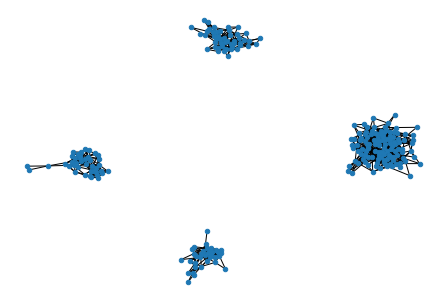

In [4]:
G = load_graph(data_path_1)
nx.draw(G, node_size=20)
plt.show()

We apply the spectral graph clustering algorithm and notice that it has identified five clusters.

In [5]:
classes, fiedler, adjacency_matrix = spectral_clustering(G)

Computing clusters...
The estimated optimal number of clusters is 5.
Clusters computed.


### Sorted Fiedler Vector

We plot the sorted Fiedler vector, that is, the eigenvector of the second smallest eigenvalue of the graph's adjacency matrix. By visual inspection, we can clearly see that the eigenvector has three distinct set of values, and the transition between them, which can indicate the existence of five clusters.

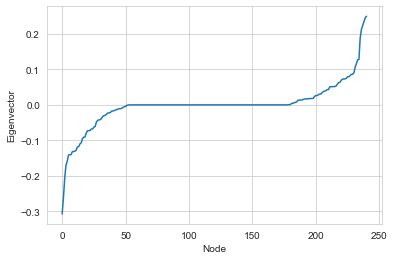

In [6]:
plt.plot(np.sort(fiedler))
plt.xlabel("Node")
plt.ylabel("Eigenvector");

### Sparsity Pattern

When plotting the adjacency matrix, the existence of five clusters becomes clear.

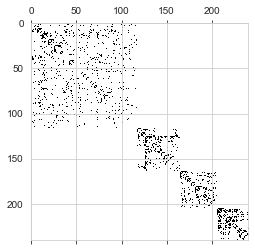

In [7]:
plt.spy(adjacency_matrix);

### Clustered Graph

Finally, we plot the graph with the colors representing the class given by the spectral graph clustering algorithm and we can see that they correspond to four different connected components, being one of those divided in two clusters.

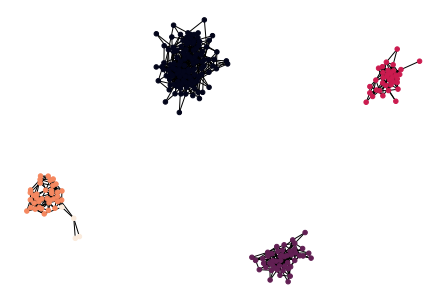

In [8]:
nx.draw(G, node_size=20, node_color=classes)

## Graph 2

We plot the second graph and we observe that it contains at least two clusters that are not separate connected components.

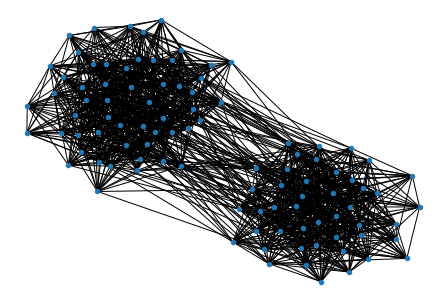

In [9]:
G = load_graph(data_path_2, weight=True)
nx.draw(G, node_size=20)
plt.show()

We apply the spectral graph clustering algorithm and confirm the existence of three clusters.

In [10]:
classes, fiedler, adjacency_matrix = spectral_clustering(G)

Computing clusters...
The estimated optimal number of clusters is 3.
Clusters computed.


### Sorted Fiedler Vector

The plot of the Fiedler Vector makes clear the existence of two clusters with a slow transition. The transition can be considered a cluster of its own, resulting in the total of three clusters. This slow transition is expected since the clusters are connected and not separate components as in the first graph.

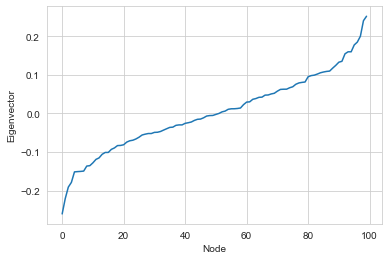

In [11]:
plt.plot(np.sort(fiedler))
plt.xlabel("Node")
plt.ylabel("Eigenvector");

### Sparsity Pattern

The sparsity pattern shows how even separate clusters are connected and the clustering task is more complex than in the first graph.

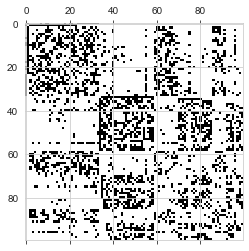

In [12]:
plt.spy(adjacency_matrix);

### Clustered Graph

The clustered graph shows a clear separation between two clusters and it is still hard to define by visual inspection the separation of the third one.

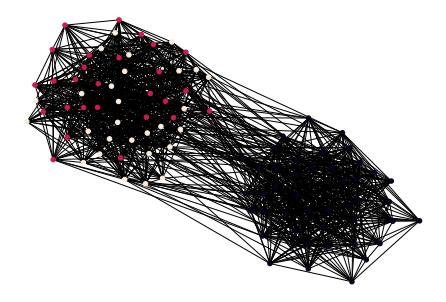

In [13]:
nx.draw(G, node_size=20, node_color=classes)